# Data Preprocessing

## Importing and Slicing

In [1]:
## Importing Libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [239]:
dataset = pd.read_csv('/content/sample_data/Data.csv')
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [240]:
print("Dataset Head:")
print(dataset.head())

Dataset Head:
   Country   Age   Salary Purchased
0   France  44.0  72000.0        No
1    Spain  27.0  48000.0       Yes
2  Germany  30.0  54000.0        No
3    Spain  38.0  61000.0        No
4  Germany  40.0      NaN       Yes


In [241]:
x = dataset.iloc[:, :-1]
x

,Country,Age,Salary
0,France,44.0,72000.0
1,Spain,27.0,48000.0
2,Germany,30.0,54000.0
3,Spain,38.0,61000.0
4,Germany,40.0,NaN
5,France,35.0,58000.0
6,Spain,NaN,52000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
9,France,37.0,67000.0


In [242]:
y = dataset.iloc[:, 3]
y

,Purchased
0,No
1,Yes
2,No
3,No
4,Yes
5,Yes
6,No
7,Yes
8,No
9,Yes


## Handling Missing Values

In [243]:
dataset.isnull()

,Country,Age,Salary,Purchased
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,True,False
5,False,False,False,False
6,False,True,False,False
7,False,False,False,False
8,False,False,False,False
9,False,False,False,False


In [244]:
dataset.isnull().sum()

,0
Country,0
Age,1
Salary,1
Purchased,0


In [245]:
dataset.isnull().values.any()

True

In [246]:
dataset.isnull().sum().sum()

2

In [247]:
missing=["n/a", "na", "--", "NaN", "NA"]
df=pd.read_csv("/content/sample_data/Data.csv", na_values = missing)
df

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [248]:
from sklearn.impute import SimpleImputer

imputer  = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

In [249]:
imputer = imputer.fit(x.iloc[:, 1:3])
imputer

SimpleImputer()

In [250]:
x.iloc[:, 1:3] = imputer.transform(x.iloc[:, 1:3])
x

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


## Encoding categorical

### Label encoding

In [251]:
from sklearn.preprocessing import LabelEncoder

lEncoder = LabelEncoder()
y = lEncoder.fit_transform(y)
y

array([0, 1, 0, 0, 1, 1, 0, 1, 0, 1])

In [252]:
pd.DataFrame(y)

,0
0,0
1,1
2,0
3,0
4,1
5,1
6,0
7,1
8,0
9,1


### One-Hot Encoder

In [253]:
pd.DataFrame(x)

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [254]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Remove the 'sparse' argument from OneHotEncoder
columnTransformer = ColumnTransformer([("Name", OneHotEncoder(sparse_output=False), [0])], remainder='passthrough')#drop
# sparse=False is deprecated, use sparse_output=False instead
x2 = columnTransformer.fit_transform(x)

pd.DataFrame(x2)

,0,1,2,3,4
0,1.0,0.0,0.0,44.000000,72000.000000
1,0.0,0.0,1.0,27.000000,48000.000000
2,0.0,1.0,0.0,30.000000,54000.000000
3,0.0,0.0,1.0,38.000000,61000.000000
4,0.0,1.0,0.0,40.000000,63777.777778
5,1.0,0.0,0.0,35.000000,58000.000000
6,0.0,0.0,1.0,38.777778,52000.000000
7,1.0,0.0,0.0,48.000000,79000.000000
8,0.0,1.0,0.0,50.000000,83000.000000
9,1.0,0.0,0.0,37.000000,67000.000000


In [255]:
from numpy import asarray

data = asarray([["red"], ["green"], ["blue"]])
print(data)

# Replace 'sparse=False' with 'sparse_output=False'
encoder = OneHotEncoder(sparse_output=False)
oneHot = encoder.fit_transform(data)

oneHot

[['red']
 ['green']
 ['blue']]


array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.]])

## Splitting

In [4]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

x, y = make_blobs(n_samples=1000)
pd.DataFrame(x)

,0,1
0,-6.164390,2.787572
1,3.152357,9.275308
2,-4.642277,1.610062
3,4.619928,8.888099
4,2.021871,10.832566
...,...,...
995,-5.188171,5.088172
996,-6.119181,2.724057
997,-3.740209,4.719074
998,-4.563215,-5.710606


In [8]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7)
print(xTrain)
print(xTrain.shape, xTest.shape, yTrain.shape, yTest.shape)
pd.DataFrame(xTrain)

[[ 3.99015072  8.56916209]
 [ 3.54229361 10.69195282]
 [-3.27236259 -6.21634252]
 ...
 [ 2.57775636  9.50084723]
 [-5.72045473  2.72013132]
 [-4.5009063  -6.2278164 ]]
(700, 2) (300, 2) (700,) (300,)


,0,1
0,3.990151,8.569162
1,3.542294,10.691953
2,-3.272363,-6.216343
3,-3.881305,-6.149275
4,-4.474361,-6.516421
...,...,...
695,-5.945779,2.302216
696,-6.086775,2.527873
697,2.577756,9.500847
698,-5.720455,2.720131


In [258]:
dataset = pd.read_csv("/content/sample_data/Data.csv")
dataset

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


In [259]:
x = dataset.iloc[:, :-1]
y = dataset.iloc[:, 3]

In [260]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7, random_state=1)
pd.DataFrame(xTrain)

,Country,Age,Salary
4,Germany,40.0,NaN
0,France,44.0,72000.0
3,Spain,38.0,61000.0
1,Spain,27.0,48000.0
7,France,48.0,79000.0
8,Germany,50.0,83000.0
5,France,35.0,58000.0


In [261]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.7)
pd.DataFrame(xTrain)

,Country,Age,Salary
3,Spain,38.0,61000.0
8,Germany,50.0,83000.0
4,Germany,40.0,NaN
0,France,44.0,72000.0
7,France,48.0,79000.0
9,France,37.0,67000.0
5,France,35.0,58000.0


### Stratified

In [262]:
from collections import Counter
from sklearn.datasets import make_classification

x,y = make_classification(n_samples=1000, weights=[0.94], flip_y=0, random_state=1)

print("distribution", Counter(y))

distribution Counter({0: 940, 1: 60})


In [263]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.5, random_state=1)

print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 475, 1: 25})
Test distribution Counter({0: 465, 1: 35})


In [264]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, train_size=0.5, random_state=1, stratify=y)

print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 470, 1: 30})
Test distribution Counter({0: 470, 1: 30})


### Scaling

#### Normalization

In [265]:
from sklearn.preprocessing import MinMaxScaler

mm_scale = MinMaxScaler().fit_transform(dataset[['Age', 'Salary']])
pd.DataFrame(mm_scale)

,0,1
0,0.739130,0.685714
1,0.000000,0.000000
2,0.130435,0.171429
3,0.478261,0.371429
4,0.565217,NaN
5,0.347826,0.285714
6,NaN,0.114286
7,0.913043,0.885714
8,1.000000,1.000000
9,0.434783,0.542857


$$x' = \frac{x - min(x)}{max(x)-min(x)}$$

#### Standardization

In [266]:
from sklearn.preprocessing import StandardScaler

std_scale = StandardScaler().fit_transform(dataset[['Age', 'Salary']])
pd.DataFrame(std_scale)

,0,1
0,0.719931,0.711013
1,-1.623675,-1.364376
2,-1.210098,-0.845529
3,-0.107224,-0.240207
4,0.168495,NaN
5,-0.520801,-0.499631
6,NaN,-1.018478
7,1.271368,1.316334
8,1.547087,1.662233
9,-0.245083,0.278640


$$z = \frac{x - \mu}{\sigma}$$

$$\mu = \frac{\sum_{i=1}^n{x_i}}{n}$$

$$\sigma = \sqrt{\frac{\sum_{i=1}^n{x_i-\mu}}{n}}$$

In [9]:
from sklearn import datasets

iris = datasets.load_iris() #http://archive.ics.uci.edu/ml/datasets/Iris
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [10]:
import pandas as pd
import numpy as np

df = pd.DataFrame(data=np.c_[iris['data'], iris['target']],
                 columns=iris['feature_names']+['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [11]:
from sklearn.preprocessing import StandardScaler

x = iris.data
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y = list(map(lambda x : targets[x], iris.target))

x = StandardScaler().fit_transform(x)
df = pd.DataFrame(data=np.c_[x, y],
                 columns=iris['feature_names']+['target'])

df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,-0.9006811702978099,1.0190043519716065,-1.3402265266227635,-1.3154442950077407,Iris-setosa
1,-1.1430169111851116,-0.1319794793216258,-1.3402265266227635,-1.3154442950077407,Iris-setosa
2,-1.3853526520724144,0.3284140531956675,-1.3970639535363667,-1.3154442950077407,Iris-setosa
3,-1.5065205225160663,0.09821728693702086,-1.2833890997091604,-1.3154442950077407,Iris-setosa
4,-1.0218490407414607,1.2492011182302531,-1.3402265266227635,-1.3154442950077407,Iris-setosa
...,...,...,...,...,...
145,1.0380047568006114,-0.1319794793216258,0.8195956960941558,1.448831575088577,Iris-virginica
146,0.5533332750260058,-1.282963310614858,0.7059208422669494,0.9223028379273737,Iris-virginica
147,0.7956690159133086,-0.1319794793216258,0.8195956960941558,1.0539350222176747,Iris-virginica
148,0.4321654045823549,0.7888075857129598,0.9332705499213622,1.448831575088577,Iris-virginica


In [18]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents,
                           columns = ['principal component 1', 'principal component 2', "principal component 3"])

principalDf

,principal component 1,principal component 2,principal component 3
0,-2.684126,0.319397,-0.027915
1,-2.714142,-0.177001,-0.210464
2,-2.888991,-0.144949,0.017900
3,-2.745343,-0.318299,0.031559
4,-2.728717,0.326755,0.090079
...,...,...,...
145,1.944110,0.187532,0.177825
146,1.527167,-0.375317,-0.121898
147,1.764346,0.078859,0.130482
148,1.900942,0.116628,0.723252


In [13]:
principalDf = pd.concat([principalDf, df[['target']]], axis = 1)
principalDf

,principal component 1,principal component 2,target
0,-2.264703,0.480027,Iris-setosa
1,-2.080961,-0.674134,Iris-setosa
2,-2.364229,-0.341908,Iris-setosa
3,-2.299384,-0.597395,Iris-setosa
4,-2.389842,0.646835,Iris-setosa
...,...,...,...
145,1.870503,0.386966,Iris-virginica
146,1.564580,-0.896687,Iris-virginica
147,1.521170,0.269069,Iris-virginica
148,1.372788,1.011254,Iris-virginica


Explained variance ratio: [0.72962445 0.22850762]


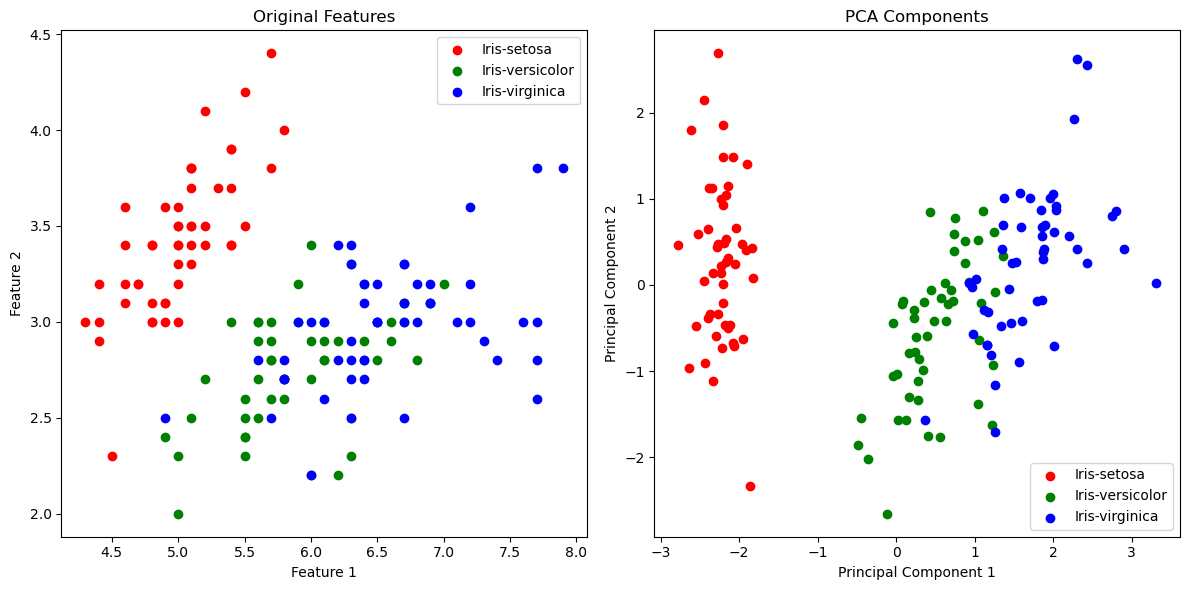

In [14]:
# Import necessary libraries
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y = list(map(lambda x: targets[x], iris.target))

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Print explained variance ratio
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

# Visualize the PCA results with class legend colors
plt.figure(figsize=(12, 6))

# Plot original features with class legend colors
plt.subplot(1, 2, 1)
for target, color in zip(targets, ['r', 'g', 'b']):
    indicesToKeep = [i for i, val in enumerate(y) if val == target]
    plt.scatter(X[indicesToKeep, 0], X[indicesToKeep, 1], c=color, label=target)
plt.title("Original Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Plot PCA components with class legend colors
plt.subplot(1, 2, 2)
for target, color in zip(targets, ['r', 'g', 'b']):
    indicesToKeep = [i for i, val in enumerate(y) if val == target]
    plt.scatter(X_pca[indicesToKeep, 0], X_pca[indicesToKeep, 1], c=color, label=target)
plt.title("PCA Components")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()

plt.tight_layout()
plt.show()


c:\Users\msi\anaconda3\envs\ELTE\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\msi\anaconda3\envs\ELTE\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\msi\anaconda3\envs\ELTE\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Selected features indices: [False  True False  True]
Ranking of features: [3 1 2 1]


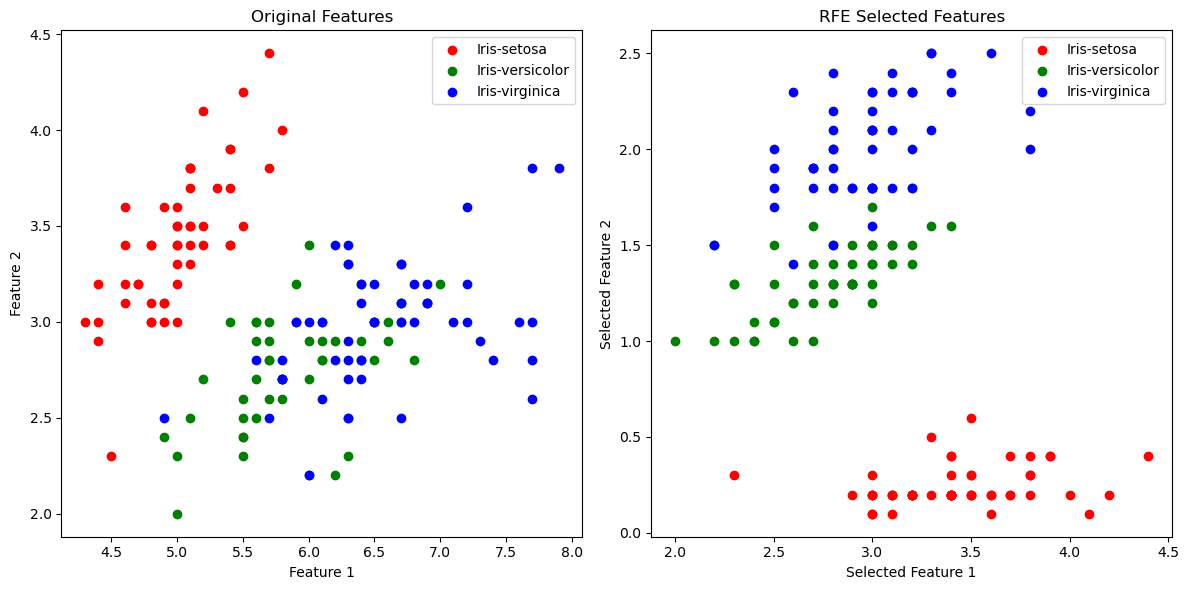

In [15]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the Iris dataset
iris = datasets.load_iris()
x = iris.data
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
y = list(map(lambda x: targets[x], iris.target))

# Create and train the model (Logistic Regression in this example)
model = LogisticRegression(solver='liblinear', multi_class='auto')

# Create RFE object and fit
rfe = RFE(estimator=model, n_features_to_select=2)
X_rfe = rfe.fit_transform(x, iris.target)

# Print the selected features and ranking
print(f"Selected features indices: {rfe.support_}")
print(f"Ranking of features: {rfe.ranking_}")

# Visualize RFE results with class legend colors
plt.figure(figsize=(12, 6))

# Plot original features with class legend colors
plt.subplot(1, 2, 1)
for target, color in zip(targets, ['r', 'g', 'b']):
    indicesToKeep = [i for i, val in enumerate(y) if val == target]
    plt.scatter(x[indicesToKeep, 0], x[indicesToKeep, 1], c=color, label=target)
plt.title("Original Features")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

# Plot selected features after RFE with class legend colors
plt.subplot(1, 2, 2)
for target, color in zip(targets, ['r', 'g', 'b']):
    indicesToKeep = [i for i, val in enumerate(y) if val == target]
    plt.scatter(X_rfe[indicesToKeep, 0], X_rfe[indicesToKeep, 1], c=color, label=target)
plt.title("RFE Selected Features")
plt.xlabel("Selected Feature 1")
plt.ylabel("Selected Feature 2")
plt.legend()

plt.tight_layout()
plt.show()


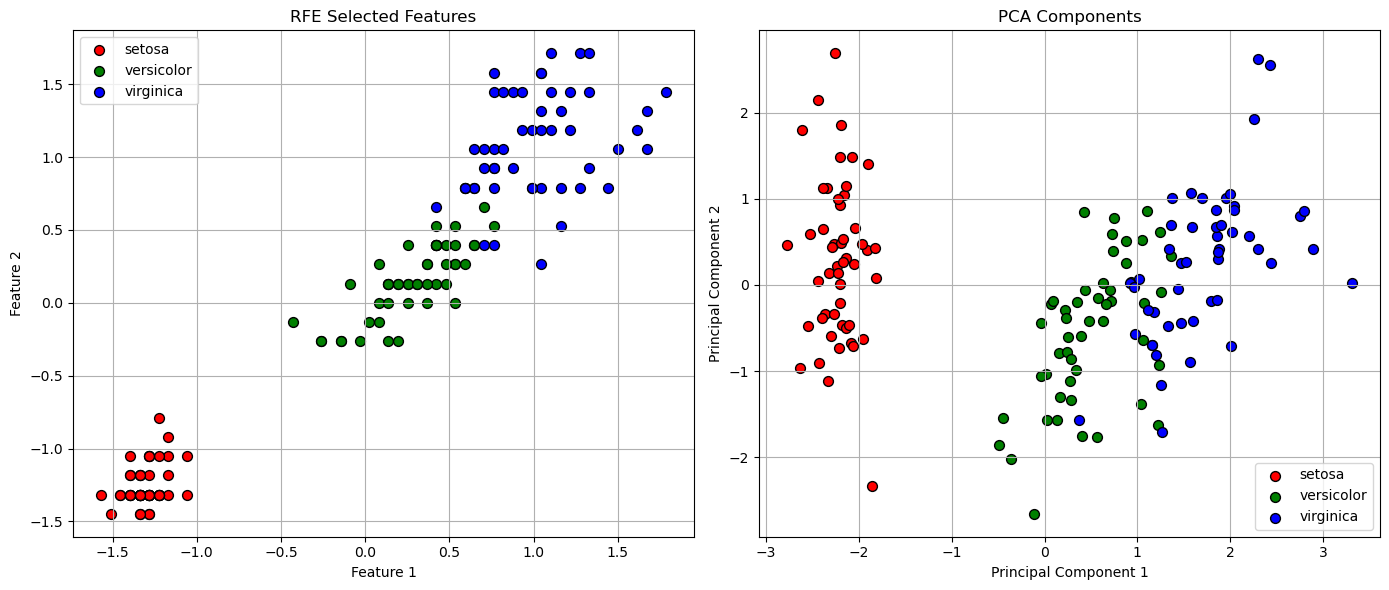

In [16]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create a DataFrame for visualization
df = pd.DataFrame(data=np.c_[X_scaled, y], columns=iris.feature_names + ['target'])

# Define colors for each class
colors = ['r', 'g', 'b']

# Recursive Feature Elimination (RFE)
# Initialize the Logistic Regression model
log_reg = LogisticRegression(solver='liblinear')

# Initialize RFE with 2 features to select
rfe = RFE(estimator=log_reg, n_features_to_select=2)
X_rfe = rfe.fit_transform(X_scaled, y)

# Create a DataFrame for RFE results
df_rfe = pd.DataFrame(data=np.c_[X_rfe, y], columns=['Feature 1', 'Feature 2', 'target'])

# Plot RFE results
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
for target, color in zip(range(len(target_names)), colors):
    indices = df_rfe['target'] == target
    plt.scatter(df_rfe.loc[indices, 'Feature 1'], df_rfe.loc[indices, 'Feature 2'],
                c=color, label=target_names[target], edgecolor='k', s=50)
plt.title('RFE Selected Features')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid()

# Principal Component Analysis (PCA)
# Initialize PCA with 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
df_pca = pd.DataFrame(data=np.c_[X_pca, y], columns=['Principal Component 1', 'Principal Component 2', 'target'])

# Plot PCA results
plt.subplot(1, 2, 2)
for target, color in zip(range(len(target_names)), colors):
    indices = df_pca['target'] == target
    plt.scatter(df_pca.loc[indices, 'Principal Component 1'], df_pca.loc[indices, 'Principal Component 2'],
                c=color, label=target_names[target], edgecolor='k', s=50)
plt.title('PCA Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
